# **Ma’lumotning shakli va hajmi (rows, columns)**

In [15]:
import pandas as pd

# Titanic datasetni yuklash
df = pd.read_csv('Titanic-Dataset.csv')

# 1. O'lcham
rows, cols = df.shape
print(f"📦 Shape: {rows} rows × {cols} columns")

# 2. Umumiy ma'lumot (turlari va non-null soni)
print("\nℹ️ DataFrame info:")
df.info()

# 3. Xotira hajmi
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\n💾 Memory usage: {mem_mb:.2f} MB")

📦 Shape: 891 rows × 12 columns

ℹ️ DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

💾 Memory usage: 0.28 MB


| Inglizcha ustun nomi | O‘zbekcha tarjimasi |
|----------------------|--------------------|
| PassengerId          | Yo‘lovchi ID raqami |
| Survived             | Omon qolganmi (1 – ha, 0 – yo‘q) |
| Pclass               | Sinfi (1 – yuqori, 2 – o‘rta, 3 – past) |
| Name                 | Ismi-sharifi |
| Sex                  | Jinsi |
| Age                  | Yoshi |
| SibSp                | Birga kelgan aka-uka/opa-singillar va turmush o‘rtog‘i soni |
| Parch                | Birga kelgan ota-ona va farzandlar soni |
| Ticket               | Chipta raqami |
| Fare                 | Chipta narxi |
| Cabin                | Kajuta raqami |
| Embarked             | Qayerdan chiqdi (port nomi) |

# **Har bir ustunning ma’nosi va turi (raqamli, kategoriyali, matn, vaqt)**

In [5]:
import pandas as pd

df_types = pd.DataFrame({
    "age": [25, 30, 22],                # int
    "height": [175.5, 180.2, 168.9],    # float
    "gender": ["male", "female", "male"], # object
    "is_student": [True, False, True],  # bool
    "join_date": pd.to_datetime(["2023-01-01", "2024-05-15", "2025-08-10"]) # datetime
})

print(df_types.dtypes)

age                    int64
height               float64
gender                object
is_student              bool
join_date     datetime64[ns]
dtype: object


In [6]:
for col in df.columns:
    print(f"📏 {col} ustuni:")
    print(f"   - Turi: {df[col].dtype}")
    print(f"   - Ma'lumotlar:\n{df[col].value_counts().head()}\n")

📏 PassengerId ustuni:
   - Turi: int64
   - Ma'lumotlar:
PassengerId
0    549
1    342
Name: count, dtype: int64

📏  Survived ustuni:
   - Turi: int64
   - Ma'lumotlar:
 Survived
3    491
1    216
2    184
Name: count, dtype: int64

📏  Pclass ustuni:
   - Turi: object
   - Ma'lumotlar:
 Pclass
"Andersson    9
"Sage         7
"Panula       6
"Skoog        6
"Carter       6
Name: count, dtype: int64

📏  Name                                                                                 ustuni:
   - Turi: object
   - Ma'lumotlar:
 Name                                                                                
Mr. James"                                                                       3
Mr. William"                                                                     3
Miss. Bertha"                                                                    3
Miss. Mary"                                                                      2
Mr. Lee"                                        

# **Statistik xulosalar**


### **Izoh**
- `describe()` — eng ko‘p ishlatiladigan statistikani chiqaradi.
- `mean()` — o‘rtacha qiymat
- `median()` — median qiymat (o'rtadagi)
- `min()` / `max()` — eng kichik va eng katta qiymat
- `std()` — standart og‘ish (ma’lumotlar tarqalishi)
- `numeric_only=True` — faqat raqamli ustunlarni hisoblaydi, matn ustunlar xatolik bermasligi uchun.

In [28]:
# Faqat raqamli ustunlar uchun qisqa statistika
stats = df.describe()  # count, mean, std, min, 25%, 50%, 75%, max

print("📊 Asosiy statistik ma'lumotlar:\n", stats)

# Qo'shimcha — faqat kerakli ustunlar bo'yicha alohida ko'rsatkichlar
print("\nMean qiymatlar:\n", df.mean(numeric_only=True))
print("\nMedian qiymatlar:\n", df.median(numeric_only=True))
print("\nMinimum qiymatlar:\n", df.min(numeric_only=True))
print("\nMaximum qiymatlar:\n", df.max(numeric_only=True))
print("\nStandart og'ish (std):\n", df.std(numeric_only=True))

📊 Asosiy statistik ma'lumotlar:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Mean qiymatlar:
 PassengerId    446.000000
Surv

# **Yetishmayotgan qiymatlarni aniqlash**

🚨 Yetishmayotgan qiymatlar soni:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

📊 Yetishmayotgan qiymatlar (%)
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


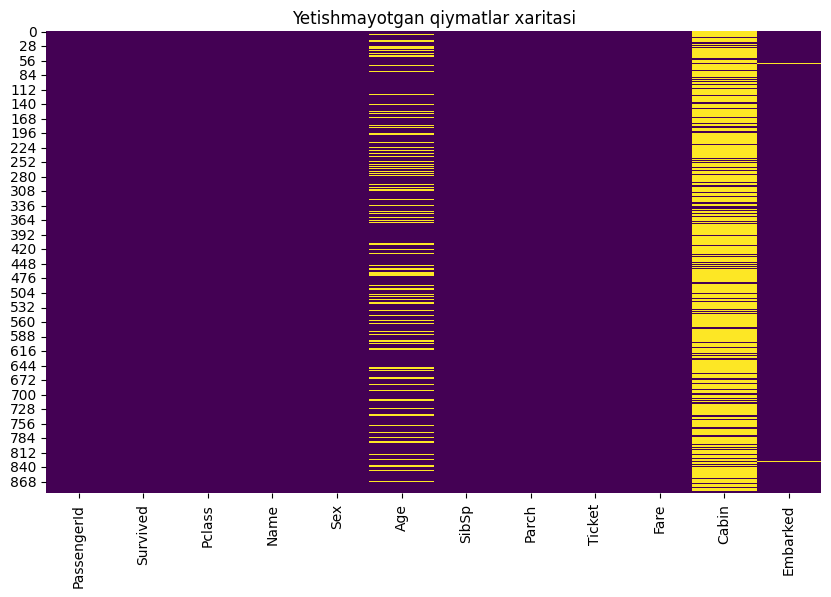

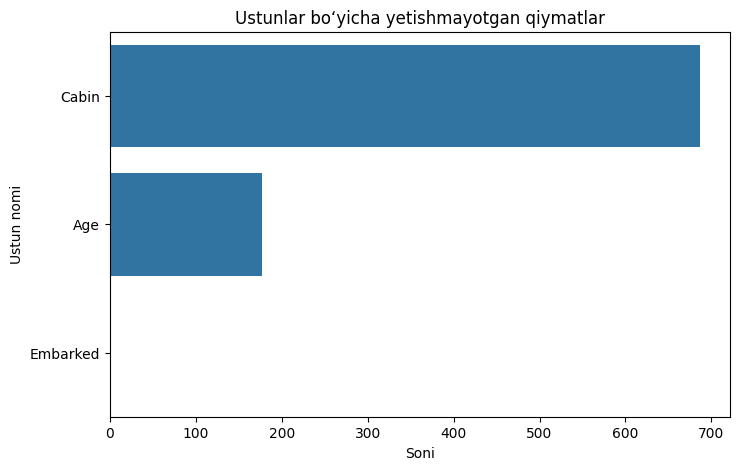

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yetishmayotgan qiymatlar soni
print("🚨 Yetishmayotgan qiymatlar soni:\n", df.isnull().sum())

# Foizni hisoblash
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\n📊 Yetishmayotgan qiymatlar (%)\n", missing_percent)

# Heatmap orqali ko‘rsatish
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Yetishmayotgan qiymatlar xaritasi")
plt.show()

# Faqat eng ko‘p bo‘sh qiymatlar bo‘lgan ustunlarni barplot bilan ko‘rsatish
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_data, y=missing_data.index)
plt.title("Ustunlar bo‘yicha yetishmayotgan qiymatlar")
plt.xlabel("Soni")
plt.ylabel("Ustun nomi")
plt.show()

# **Noodatiy qiymatlar**

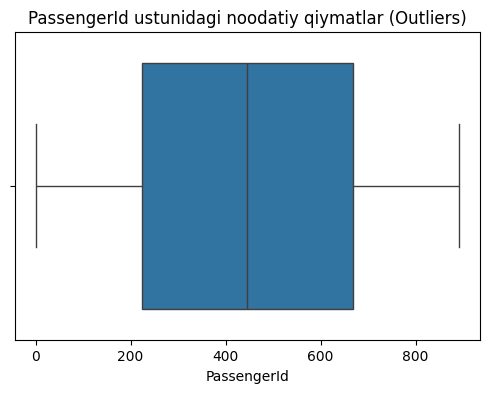

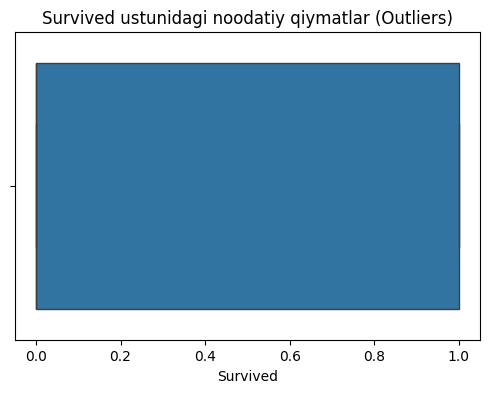

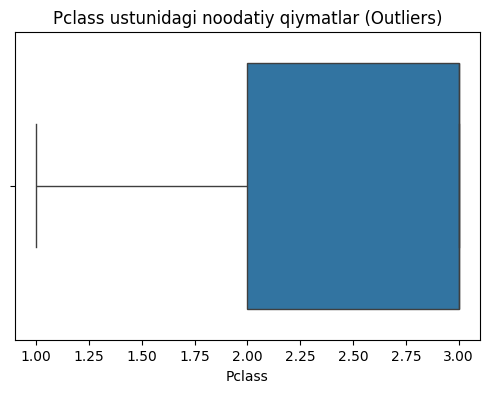

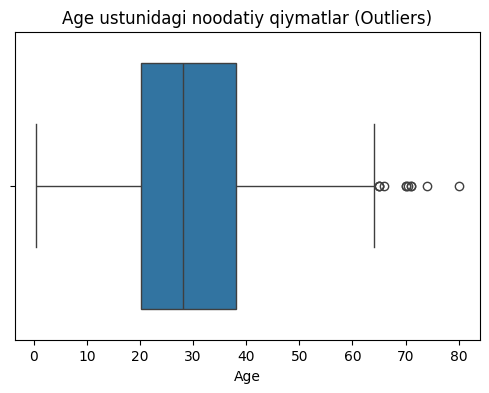

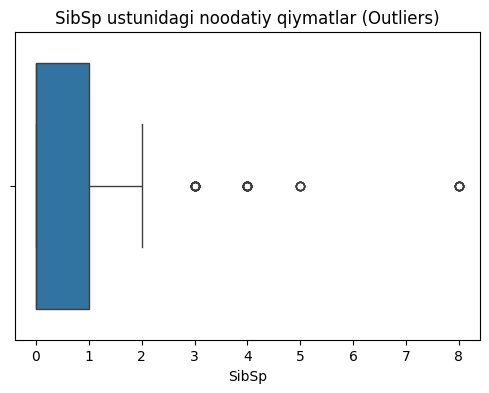

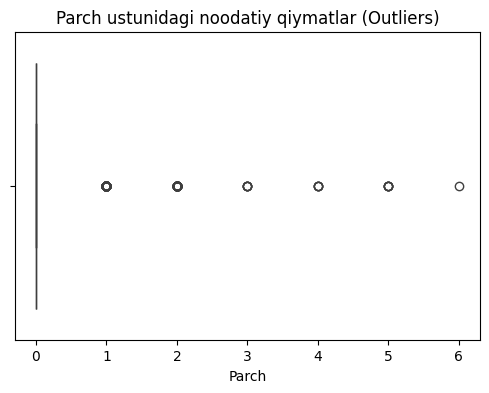

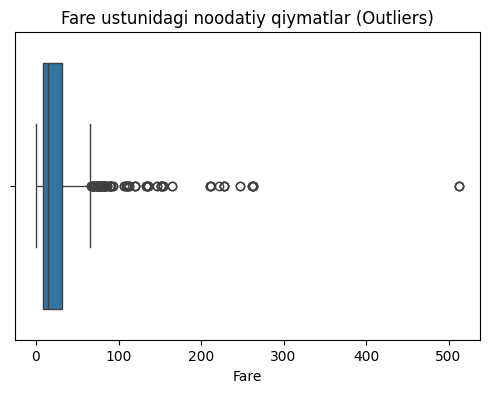

⚠️ Age: 2 ta outlier
⚠️ SibSp: 30 ta outlier
⚠️ Parch: 15 ta outlier
⚠️ Fare: 20 ta outlier


In [21]:
# Faqat raqamli ustunlar
num_cols = df.select_dtypes(include='number').columns

# Har bir ustun uchun boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} ustunidagi noodatiy qiymatlar (Outliers)")
    plt.show()

# Z-score usuli bilan outlier aniqlash
from scipy import stats

z_scores = pd.DataFrame(index=df.index)

for col in num_cols:
    s = df[col]
    z = (s - s.mean(skipna=True)) / s.std(skipna=True, ddof=0)
    z_scores[col] = z
    mask = z.abs() > 3
    if mask.any():
        print(f"⚠️ {col}: {mask.sum()} ta outlier")

In [ ]:
# qaysi sinfdagilar ko'proq omon qolgan?
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

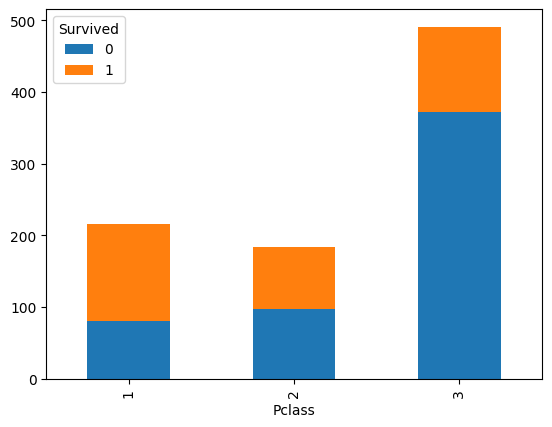

In [32]:
df.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)